# Predicting Rain In Australia

The dataset used here is [Rain In Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. The objective here is to predict next day rain in Australia using classification models.

This dataset contains about 10 years of daily weather observations from different locations across Australia. RainTomorrow is the target variable to predict. This column is Yes if the rain for that day was 1mm or more and No otherwise.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [2]:
rain_df = pd.read_csv('raininaustralia/weatherAUS.csv')

In [3]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## EDA

<AxesSubplot:>

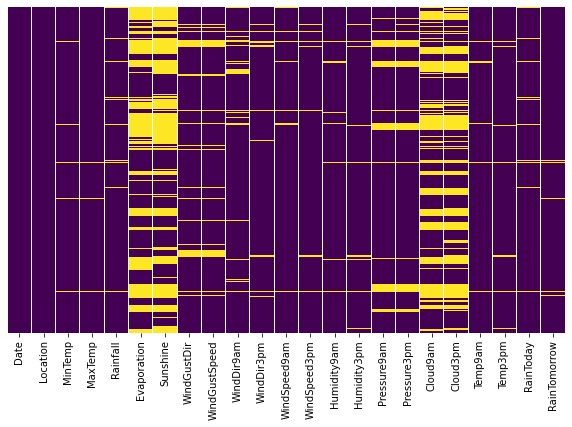

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(rain_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Here we can observe that there is a lot of missing data for Evaporation, Sunshine, Cloud9am, Cloud3pm. And there are null values in many other columns as well including the RainTomorrow column which is the target variable.

<AxesSubplot:>

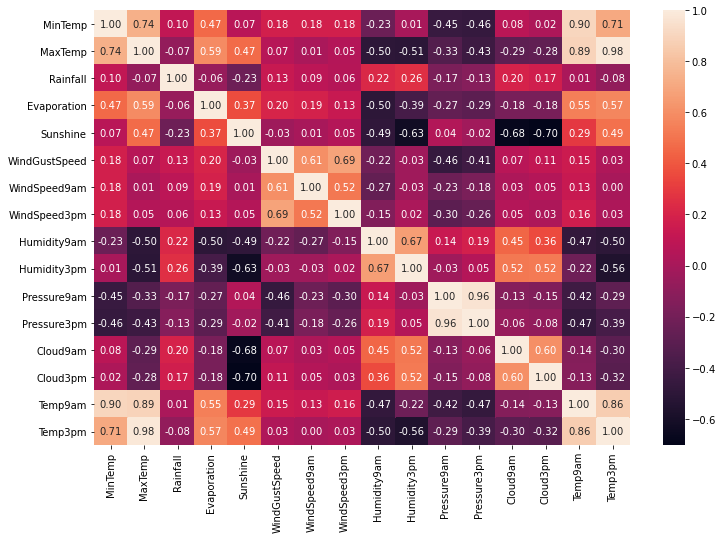

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(rain_df.corr(), annot=True, fmt='.2f')

We can see that there are many features which are negatively correlated as  well as which are positively correlated to each other.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

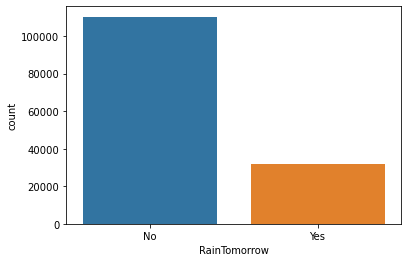

In [8]:
sns.countplot(x='RainTomorrow', data=rain_df)

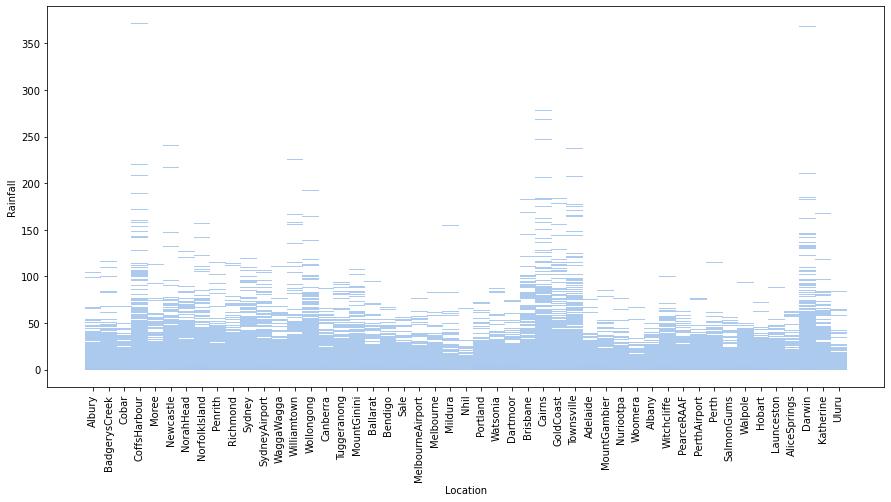

In [9]:
plt.figure(figsize=(15,7))
sns.histplot(x='Location', y='Rainfall', data=rain_df)
plt.xticks(rotation=90);

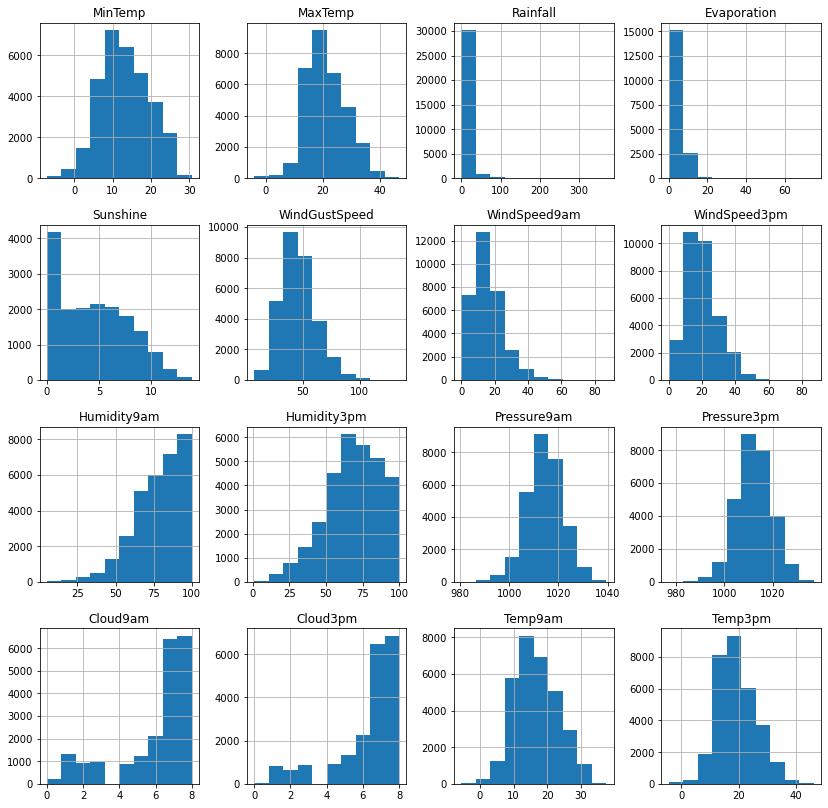

In [10]:
rain_df[rain_df['RainTomorrow']=='Yes'].hist(figsize=(14, 14));

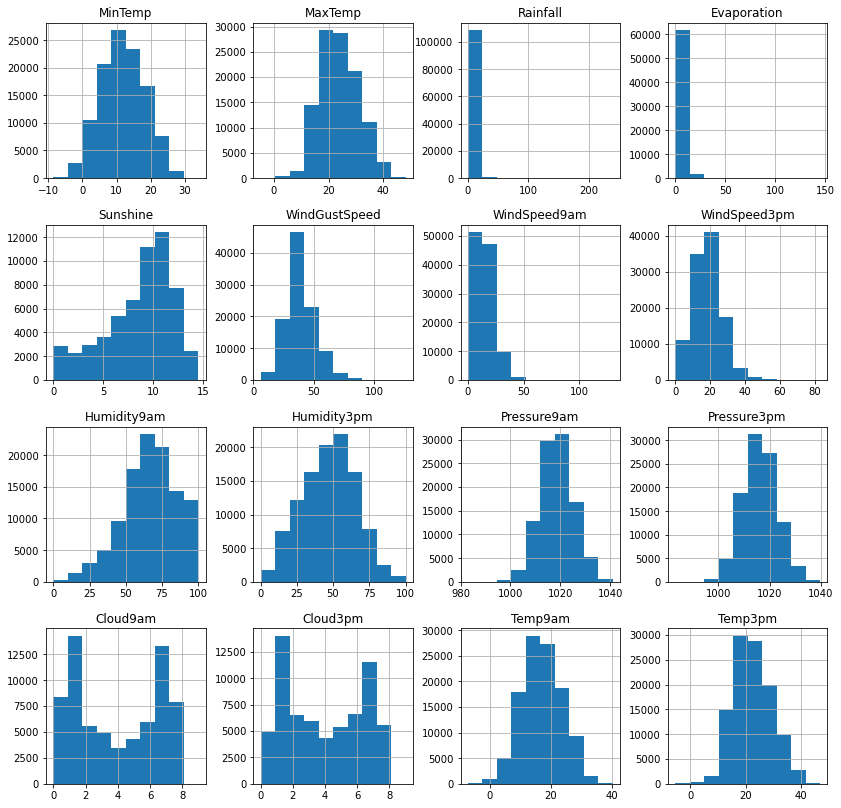

In [11]:
rain_df[rain_df['RainTomorrow']=='No'].hist(figsize=(14, 14));

## Data Cleaning, Data Imputation and Feature Engineering

Except the Date and the Location columns, all the remaining columns have missing data. We can study the data for each column and fill in the missing values. We can extract the month from the date and create a new feature for the month.

In [12]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
type(rain_df['Date'].iloc[0])

str

We need to convert the string type to datetime type and then extract the month.

In [14]:
rain_df['Date'] = pd.to_datetime(rain_df['Date'])

In [15]:
rain_df['Date'].iloc[0]

Timestamp('2008-12-01 00:00:00')

Now that the Date column are actually DateTime objects, we can create a new column called Month.

In [16]:
rain_df['Month'] = rain_df['Date'].apply(lambda x: x.month)

We know from the heatmap before that there is a lot of missing data in Evaporation, Sunshine, Cloud9am and Cloud3pm features.

In [17]:
rain_df['Location'].nunique()

49

In [18]:
rain_df[rain_df['Evaporation'].notnull()==True]['Location'].nunique()

33

We can observe that the total number of locations is 49 but there are only 33 locations for which the Evaporation data is available.

In [19]:
rain_df[rain_df['Sunshine'].notnull()==True]['Location'].nunique()

30

In [20]:
rain_df[rain_df['Cloud9am'].notnull()==True]['Location'].nunique()

37

In [21]:
rain_df[rain_df['Cloud3pm'].notnull()==True]['Location'].nunique()

37

There are many locations for which there is no data for Evaporation, Sunshine, Cloud9am and Cloud3pm. We will drop these columns from the dataset.

In [22]:
rain_df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], inplace=True, axis=1)

We know that there are other columns with missing values. Let us first start with MinTemp column.

In [23]:
rain_df[rain_df['MinTemp'].isnull()==True][['Location','MinTemp','Month']]

,Location,MinTemp,Month
284,Albury,NaN,9
444,Albury,NaN,2
453,Albury,NaN,2
459,Albury,NaN,3
612,Albury,NaN,8
...,...,...,...
144324,Uluru,NaN,5
144325,Uluru,NaN,5
144326,Uluru,NaN,5
144925,Uluru,NaN,1


We can fill the missing MinTemp values by taking the mean by the Location and by Month. For each Location we can see what the mean MinTemp is for each Month. 

In [24]:
rain_df[rain_df['Location']=='Albury'].groupby('Month').mean()['MinTemp']

Month
1     16.874194
2     16.747321
3     13.790647
4      9.502083
5      5.455197
6      3.464528
7      3.654435
8      3.764777
9      5.800000
10     8.290688
11    12.552917
12    14.518548
Name: MinTemp, dtype: float64

We can fill the columns MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm with the mean values by Location by Month.

In [25]:
locations = rain_df['Location'].unique()
months = rain_df['Month'].unique()

In [26]:
def fill_missing_values(feature_name='MinTemp'):
    """
    This function calculates the mean value for each feature by location by month 
    and replaces the null values with these values.
    """
    for location in locations:
        # Calculating the mean by month for each location in the locations for feature    
        feature_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()[feature_name]
        
        for month in months:
            # Finding the mean feature value for the month in the loop
            # and replacing the missing values with that mean value for the month
            feature_mean_month = feature_mean.loc[month]
            rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), feature_name] = \
            rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), feature_name].fillna(feature_mean_month)
        

In [27]:
rain_df.select_dtypes(exclude=[np.object]).columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Month'],
      dtype='object')

We can call the above function for each of the numerical features with null values.

Since 'Date' and 'Month' doesn't have any missing values, we can exclude that column. 

In [28]:
fill_missing_values('MinTemp')

In [29]:
fill_missing_values('MaxTemp')

In [30]:
fill_missing_values('Rainfall')

In [31]:
fill_missing_values('WindGustSpeed')

In [32]:
fill_missing_values('WindSpeed9am')

In [33]:
fill_missing_values('WindSpeed3pm')

In [34]:
fill_missing_values('Humidity9am')

In [35]:
fill_missing_values('Humidity3pm')

In [36]:
fill_missing_values('Pressure9am')

In [37]:
fill_missing_values('Pressure3pm')

In [38]:
fill_missing_values('Temp9am')

In [39]:
fill_missing_values('Temp3pm')

Let us check for null values in the dataframe.

In [40]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed     6079
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Month                0
dtype: int64

Let us check if there are any missing values for any locations for the numerical columns with null values.

In [41]:
rain_df[rain_df['WindGustSpeed'].notnull()==True]['Location'].nunique()

47

In [42]:
rain_df[rain_df['Pressure9am'].notnull()==True]['Location'].nunique()

45

In [43]:
rain_df[rain_df['Pressure3pm'].notnull()==True]['Location'].nunique()

45

Let us check what these locations are which have only null values.

In [44]:
rain_df[rain_df['WindGustSpeed'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Albany'], dtype=object)

In [45]:
rain_df[rain_df['Pressure9am'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Penrith', 'MountGinini', 'SalmonGums'], dtype=object)

In [46]:
rain_df[rain_df['Pressure3pm'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Penrith', 'MountGinini', 'SalmonGums'], dtype=object)

We can observe that there are few locations where there are only null values for WindGustSpeed, Pressure9am and Pressure3pm.

Let us see if there are any missing values for any locations for the categorical features.

In [47]:
rain_df[rain_df['WindGustDir'].notnull()==True]['Location'].nunique()

47

In [48]:
rain_df[rain_df['WindDir9am'].notnull()==True]['Location'].nunique()

49

In [49]:
rain_df[rain_df['WindDir3pm'].notnull()==True]['Location'].nunique()

49

In [50]:
rain_df[rain_df['RainToday'].notnull()==True]['Location'].nunique()

49

In [51]:
rain_df[rain_df['RainTomorrow'].notnull()==True]['Location'].nunique()

49

We can observe that the 'WindGustDir' categorical feature has 2 locations corresponding to which there are only null values.

We can fill in the missing categorical values with the most frequently occuring values for each of the locations.

In [52]:
for location in locations:
    
    most_freq_values = rain_df[rain_df['Location']==location].select_dtypes(include='object').mode().iloc[0]
    
    rain_df.loc[(rain_df['Location']==location)] = \
    rain_df.loc[(rain_df['Location']==location)].fillna(most_freq_values)

In [53]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       6079
WindGustSpeed     6079
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
Month                0
dtype: int64

In [54]:
rain_df[rain_df['WindGustDir'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Albany'], dtype=object)

We can check for the most correlated features for the WindGustSpeed, Pressure9am, Pressure3pm features from the heatmap of the correlation matrix for numerical data in Exploratory Data Analysis.

**WindGustSpeed is most positively correlated to WindSpeed3pm followed by WindSpeed9am and is most negatively correlated to Pressure9am and Pressure3pm. But there are already missing values in Pressure9am and Pressure3pm for 'Newcastle' location which also has missing values for WindGustSpeed, so it is better if we do not consider this for filling in the missing values of WindGustSpeed.**

**Pressure9am and Pressure3pm are most correlated to MinTemp, MaxTemp, WindGustSpeed, Temp9am, Temp3pm.**

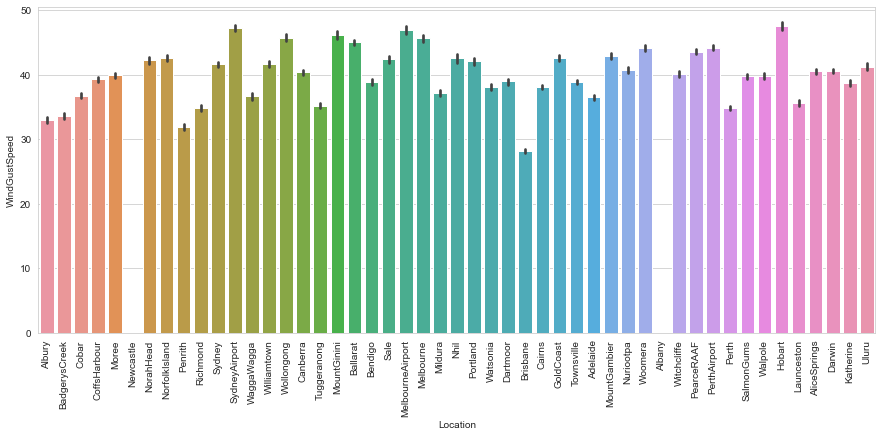

In [55]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.barplot(x='Location', y='WindGustSpeed', data=rain_df)
plt.xticks(rotation=90);

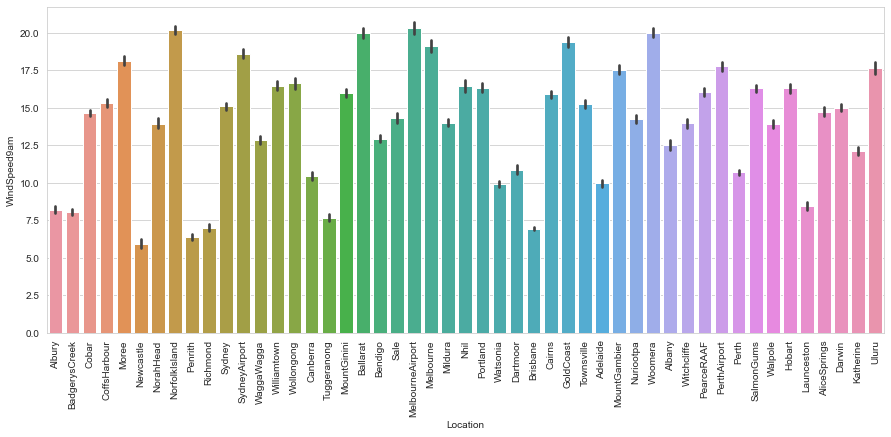

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='WindSpeed9am', data=rain_df)
plt.xticks(rotation=90);

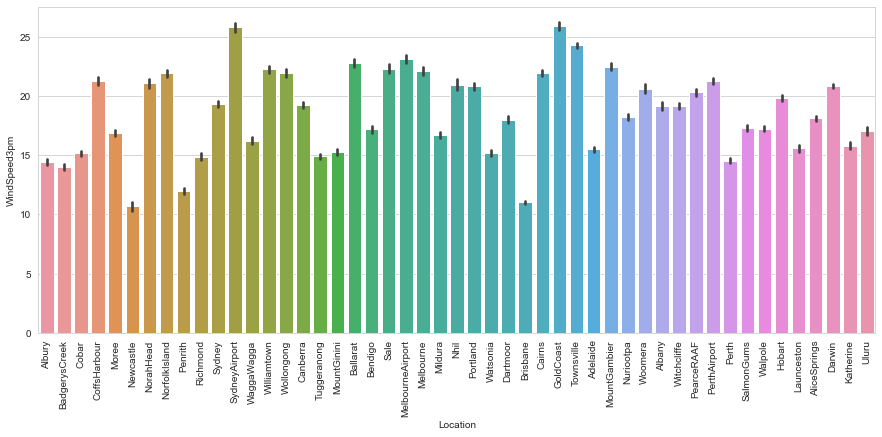

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='WindSpeed3pm', data=rain_df)
plt.xticks(rotation=90);

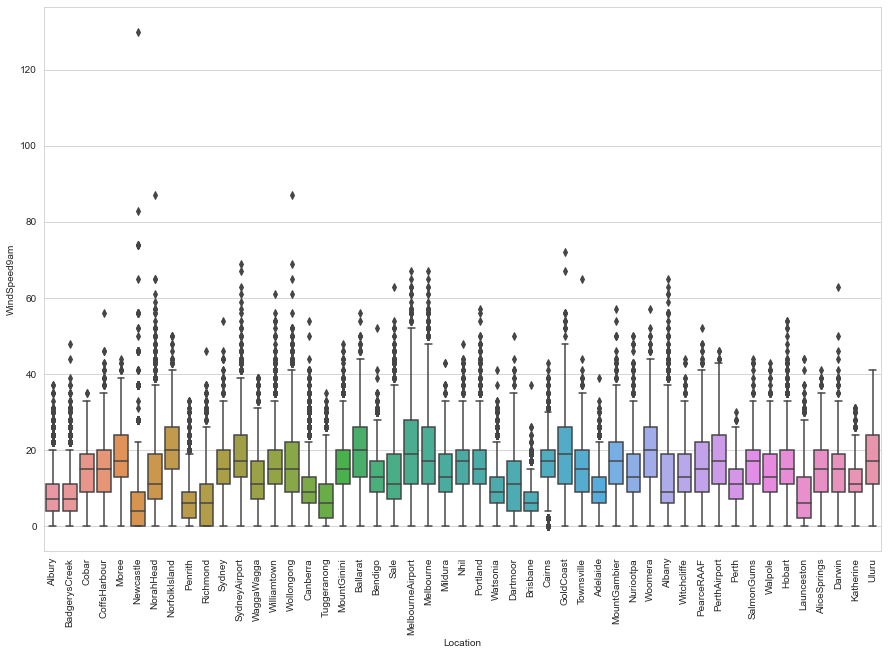

In [58]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Location', y='WindSpeed9am', data=rain_df)
plt.xticks(rotation=90);

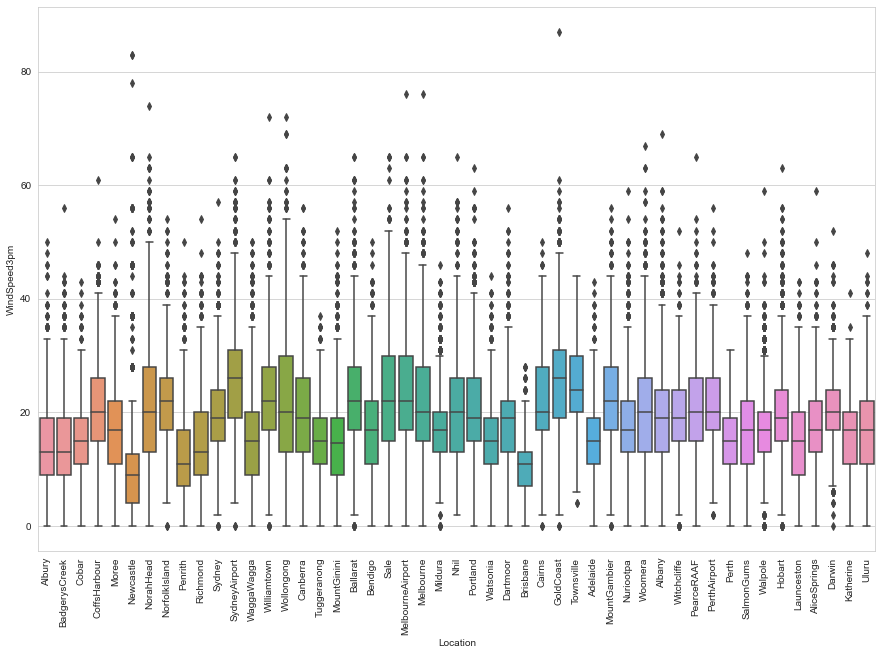

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Location', y='WindSpeed3pm', data=rain_df)
plt.xticks(rotation=90);

From the above plots we can observe that Newcastle's values are similar to Brisbane and Albany's values are similar to Witchcliffe.

**We can replace null values for WindGustSpeed and WindGustDir for Newcastle and Albany with values for Brisbane and Witchcliffe respectively.**

In [77]:
rain_df[rain_df['Location']=='Brisbane'][['WindGustSpeed','WindGustDir']]

,WindGustSpeed,WindGustDir
84007,26.0,WNW
84008,30.0,W
84009,22.0,E
84010,24.0,SW
84011,37.0,S
...,...,...
87195,20.0,WSW
87196,20.0,SE
87197,24.0,W
87198,17.0,S


In [78]:
rain_df[rain_df['Location']=='Newcastle'][['WindGustSpeed','WindGustDir']]

,WindGustSpeed,WindGustDir
15076,NaN,NaN
15077,NaN,NaN
15078,NaN,NaN
15079,NaN,NaN
15080,NaN,NaN
...,...,...
18110,NaN,NaN
18111,NaN,NaN
18112,NaN,NaN
18113,NaN,NaN


We can fill the 3039 row values for WindGustSpeed and WindGustDir in Newcastle location with first 3039 row values from Brisbane.

In [79]:
new_index = rain_df[rain_df['Location']=='Newcastle'][['WindGustSpeed','WindGustDir']].index
new_index

Int64Index([15076, 15077, 15078, 15079, 15080, 15081, 15082, 15083, 15084,
            15085,
            ...
            18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113,
            18114],
           dtype='int64', length=3039)

In [83]:
newcastle_new_values = rain_df[rain_df['Location']=='Brisbane'][['WindGustSpeed','WindGustDir']][:3039].copy()
newcastle_new_values.index = new_index
newcastle_new_values

,WindGustSpeed,WindGustDir
15076,26.0,WNW
15077,30.0,W
15078,22.0,E
15079,24.0,SW
15080,37.0,S
...,...,...
18110,26.0,NNE
18111,28.0,ESE
18112,28.0,NNE
18113,44.0,SE


In [84]:
rain_df.loc[(rain_df['Location']=='Newcastle'), ['WindGustSpeed','WindGustDir']] = \
rain_df.loc[(rain_df['Location']=='Newcastle'), ['WindGustSpeed','WindGustDir']].fillna(newcastle_new_values)

In [85]:
rain_df[rain_df['Location']=='Newcastle'][['WindGustSpeed','WindGustDir']]

,WindGustSpeed,WindGustDir
15076,26.0,WNW
15077,30.0,W
15078,22.0,E
15079,24.0,SW
15080,37.0,S
...,...,...
18110,26.0,NNE
18111,28.0,ESE
18112,28.0,NNE
18113,44.0,SE


In [86]:
rain_df[rain_df['Location']=='Witchcliffe'][['WindGustSpeed','WindGustDir']]

,WindGustSpeed,WindGustDir
111611,39.0,SSE
111612,50.0,SSE
111613,44.0,SE
111614,44.0,SSE
111615,44.0,SSE
...,...,...
114615,59.0,NNE
114616,65.0,SSE
114617,56.0,SE
114618,37.0,SE


In [87]:
rain_df[rain_df['Location']=='Albany'][['WindGustSpeed','WindGustDir']]

,WindGustSpeed,WindGustDir
108571,NaN,NaN
108572,NaN,NaN
108573,NaN,NaN
108574,NaN,NaN
108575,NaN,NaN
...,...,...
111606,NaN,NaN
111607,NaN,NaN
111608,NaN,NaN
111609,NaN,NaN


Since there are only 3009 row values for Witchcliffe but the missing values for Albany are 3040 rows, we can fill Albany row values with Witchcliffe row values twice so that all the 3040 rows are filled.

In [91]:
new_index_alb = rain_df[rain_df['Location']=='Albany'][['WindGustSpeed','WindGustDir']].index
new_index_alb

Int64Index([108571, 108572, 108573, 108574, 108575, 108576, 108577, 108578,
            108579, 108580,
            ...
            111601, 111602, 111603, 111604, 111605, 111606, 111607, 111608,
            111609, 111610],
           dtype='int64', length=3040)

In [92]:
witchcliffe_values = rain_df[rain_df['Location']=='Witchcliffe'][['WindGustSpeed','WindGustDir']].copy()
albany_new_values = pd.concat([witchcliffe_values,witchcliffe_values[:31]])
albany_new_values.index = new_index_alb
albany_new_values

,WindGustSpeed,WindGustDir
108571,39.0,SSE
108572,50.0,SSE
108573,44.0,SE
108574,44.0,SSE
108575,44.0,SSE
...,...,...
111606,50.0,S
111607,46.0,SSE
111608,39.0,SSE
111609,50.0,SSE


In [93]:
rain_df.loc[(rain_df['Location']=='Albany'), ['WindGustSpeed','WindGustDir']] = \
rain_df.loc[(rain_df['Location']=='Albany'), ['WindGustSpeed','WindGustDir']].fillna(albany_new_values)

In [94]:
rain_df[rain_df['Location']=='Albany'][['WindGustSpeed','WindGustDir']]

,WindGustSpeed,WindGustDir
108571,39.0,SSE
108572,50.0,SSE
108573,44.0,SE
108574,44.0,SSE
108575,44.0,SSE
...,...,...
111606,50.0,S
111607,46.0,SSE
111608,39.0,SSE
111609,50.0,SSE


In [96]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
Month                0
dtype: int64

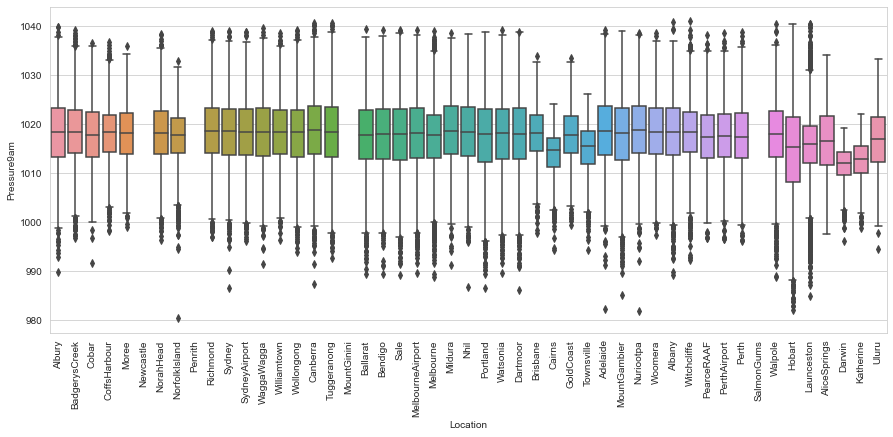

In [100]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='Pressure9am', data=rain_df)
plt.xticks(rotation=90);

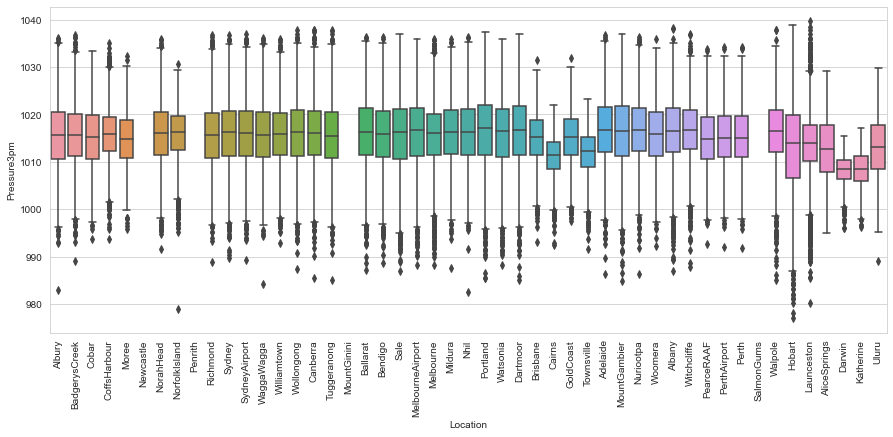

In [102]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='Pressure3pm', data=rain_df)
plt.xticks(rotation=90);

**We can observe from the correlation heatmap that the Pressure9am and Pressure3pm are most negatively correlated to MinTemp and Temp9am. We can observe the locations in the plots below for which there are null values in Pressures.**

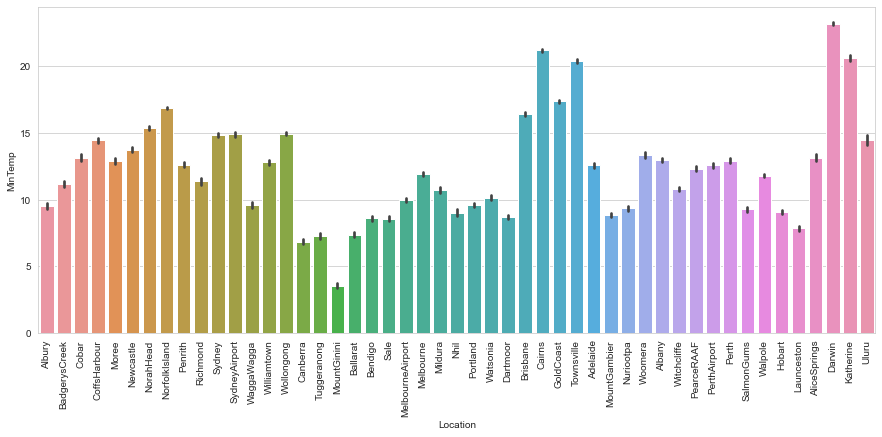

In [103]:
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='MinTemp', data=rain_df)
plt.xticks(rotation=90);

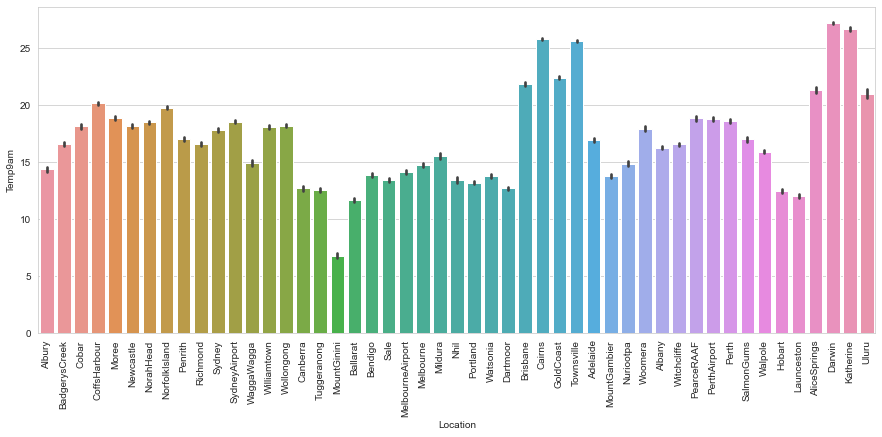

In [104]:
plt.figure(figsize=(15,6))
sns.barplot(x='Location', y='Temp9am', data=rain_df)
plt.xticks(rotation=90);

**From the above two plots we can conclude that the closest temperature values for Newcastle and Penrith is Williamtown, for MountGinini is Canberra and for SalmonGums is Nuriootpa.**

In [106]:
rain_df[rain_df['Location']=='Williamtown'][['Pressure9am','Pressure3pm']].mean()

Pressure9am    1018.427024
Pressure3pm    1015.916247
dtype: float64

In [107]:
rain_df.loc[(rain_df['Location']=='Newcastle'), 'Pressure9am'] = \
rain_df.loc[(rain_df['Location']=='Newcastle'), 'Pressure9am'].fillna(rain_df[rain_df['Location']=='Williamtown']['Pressure9am'].mean())

In [109]:
rain_df.loc[(rain_df['Location']=='Newcastle'), 'Pressure3pm'] = \
rain_df.loc[(rain_df['Location']=='Newcastle'), 'Pressure3pm'].fillna(rain_df[rain_df['Location']=='Williamtown']['Pressure3pm'].mean())

In [110]:
rain_df.loc[(rain_df['Location']=='Penrith'), 'Pressure9am'] = \
rain_df.loc[(rain_df['Location']=='Penrith'), 'Pressure9am'].fillna(rain_df[rain_df['Location']=='Williamtown']['Pressure9am'].mean())

In [111]:
rain_df.loc[(rain_df['Location']=='Penrith'), 'Pressure3pm'] = \
rain_df.loc[(rain_df['Location']=='Penrith'), 'Pressure3pm'].fillna(rain_df[rain_df['Location']=='Williamtown']['Pressure3pm'].mean())

In [112]:
rain_df[rain_df['Location']=='Canberra'][['Pressure9am','Pressure3pm']].mean()

Pressure9am    1018.854898
Pressure3pm    1016.095847
dtype: float64

In [113]:
rain_df.loc[(rain_df['Location']=='MountGinini'), 'Pressure9am'] = \
rain_df.loc[(rain_df['Location']=='MountGinini'), 'Pressure9am'].fillna(rain_df[rain_df['Location']=='Canberra']['Pressure9am'].mean())

In [114]:
rain_df.loc[(rain_df['Location']=='MountGinini'), 'Pressure3pm'] = \
rain_df.loc[(rain_df['Location']=='MountGinini'), 'Pressure3pm'].fillna(rain_df[rain_df['Location']=='Canberra']['Pressure3pm'].mean())

In [115]:
rain_df[rain_df['Location']=='Nuriootpa'][['Pressure9am','Pressure3pm']].mean()

Pressure9am    1018.911003
Pressure3pm    1016.793549
dtype: float64

In [116]:
rain_df.loc[(rain_df['Location']=='SalmonGums'), 'Pressure9am'] = \
rain_df.loc[(rain_df['Location']=='SalmonGums'), 'Pressure9am'].fillna(rain_df[rain_df['Location']=='Nuriootpa']['Pressure9am'].mean())

In [117]:
rain_df.loc[(rain_df['Location']=='SalmonGums'), 'Pressure3pm'] = \
rain_df.loc[(rain_df['Location']=='SalmonGums'), 'Pressure3pm'].fillna(rain_df[rain_df['Location']=='Nuriootpa']['Pressure3pm'].mean())

In [118]:
rain_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64